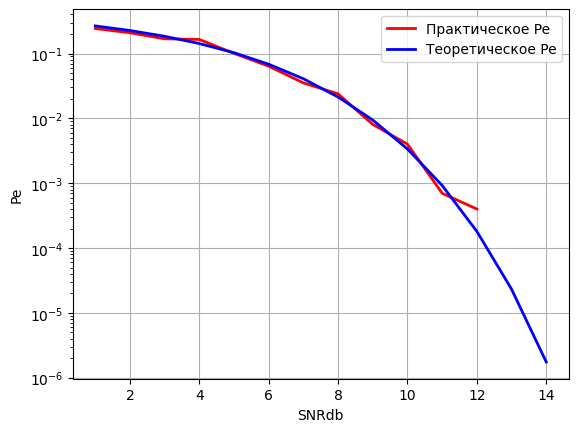

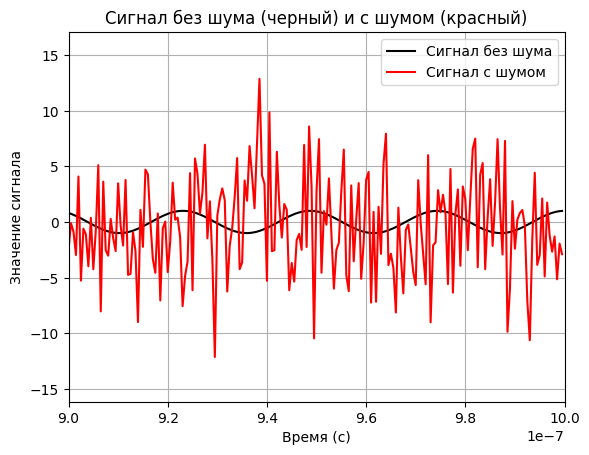

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

q, T, f0 = 2, 1e-6, 40e6
dtf, Ns, A = 1 / T, 50, 1
dt = 1 / (Ns * f0)

t = np.arange(0, T, dt)
f = np.zeros(q)
s = np.zeros((q, len(t)))
f1 = np.zeros((q, len(t)))
f2 = np.zeros((q, len(t)))

for i in range(q):
    f[i] = f0 + (i - 1) * dtf
    s[i, :] = A * np.cos(2 * np.pi * f[i] * t) ## вот это убрать заменить на два массива
    f1[i, :] = np.sqrt(2 / T) * np.cos(2 * np.pi * f[i] * t)
    f2[i, :] = np.sqrt(2 / T) * np.sin(2 * np.pi * f[i] * t)

E = np.linalg.norm(s[0, :])**2
max_value = 0
index_max = 0
Nerrmax = 70
num_tests = 10000
SNRdb = np.arange(1, 15)
Pe = np.zeros(len(SNRdb))
Pe_teor = np.zeros(len(SNRdb))

for ns in range(len(SNRdb)):
    SNR = 10**(SNRdb[ns] / 10)
    N0 = E / SNR
    sigma = np.sqrt(N0 / 2)
    Nerr, Ntest, Pe_t = 0, 0, 0
    
    for l in range(1, q):
        Pe_t += comb(q - 1, l) * (-1)**(l + 1) * 1 / (1 + l) * np.exp(-l / (l + 1) * E / N0)
    last_test = Ntest

    while (Nerr < Nerrmax):
        i = np.random.randint(q)
        r = np.cos(2 * np.pi * f[i] * t + 2 * np.pi * np.random.rand()) + sigma * np.random.randn(len(t)) ## вот эту хуйню изменить

        rci = np.zeros(q)
        rsi = np.zeros(q)
        ni = np.zeros(q)

        for j in range(q):
            rci[j] = np.trapz(r * f1[j, :])
            rsi[j] = np.trapz(r * f2[j, :])
            ni[j] = (rci[j]**2) + (rsi[j]**2)

        max_value = np.max(ni)
        index_max = np.argmax(ni)
        if index_max != i:
            Nerr += 1
            
        Ntest += 1
        if Ntest - last_test > num_tests:
            break
        
    Pe[ns] = Nerr / Ntest
    Pe_teor[ns] = Pe_t

Pe[-2:] = None
plt.figure(1)
plt.semilogy(SNRdb, Pe, 'r', SNRdb, Pe_teor, "blue", linewidth=2)
plt.xlabel('SNRdb')
plt.ylabel('Pe')
plt.legend(['Практическое Pe', 'Теоретическое Pe'])
plt.grid(True)

plt.figure(2)
plt.plot(t, s[i, :], 'k', t, r, 'r')
plt.title('Сигнал без шума (черный) и с шумом (красный)')
plt.xlabel('Время (с)')
plt.ylabel('Значение сигнала')
plt.legend(['Сигнал без шума', 'Сигнал с шумом'])
plt.xlim([0.9 * 10**-6, 1.0 * 10**-6])
plt.grid(True)
plt.show()

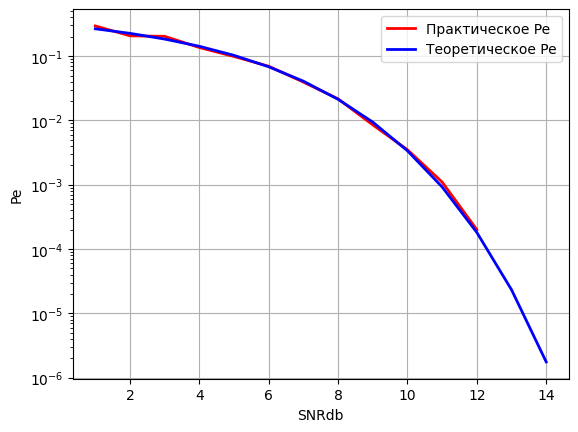

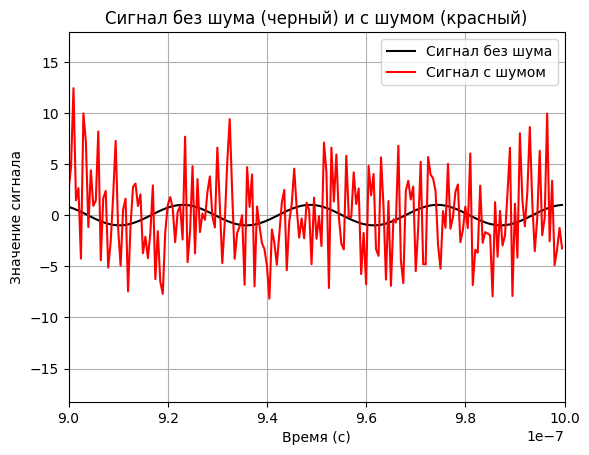

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

q, T, f0 = 2, 1e-6, 40e6
dtf, Ns, A = 1 / T, 50, 1
dt = 1 / (Ns * f0)

t = np.arange(0, T, dt)
f = np.zeros(q)
s = np.zeros((q, len(t)))
f1 = np.zeros((q, len(t)))
f2 = np.zeros((q, len(t)))

for i in range(q):
    f[i] = f0 + (i - 1) * dtf
    s[i, :] = A * np.cos(2 * np.pi * f[i] * t)
    f1[i, :] = np.sqrt(2 / T) * np.cos(2 * np.pi * f[i] * t)
    f2[i, :] = np.sqrt(2 / T) * np.sin(2 * np.pi * f[i] * t)

E = np.linalg.norm(s[0, :]) ** 2
max_value = 0
index_max = 0
Nerrmax = 70
num_tests = 10000
SNRdb = np.arange(1, 15)
Pe = np.zeros(len(SNRdb))
Pe_teor = np.zeros(len(SNRdb))

for ns in range(len(SNRdb)):
    SNR = 10 ** (SNRdb[ns] / 10)
    N0 = E / SNR
    sigma = np.sqrt(N0 / 2)
    Nerr = 0
    Ntest = 0
    Pe_t = 0
    for l in range(1, q):
        Pe_t += comb(q - 1, l) * (-1) ** (l + 1) * 1 / (1 + l) * np.exp(-l / (l + 1) * E / N0)
    last_test = Ntest
    while (Nerr < Nerrmax):
        i = np.random.randint(q)
        r = np.cos(2 * np.pi * f[i] * t + 2 * np.pi * np.random.rand()) + sigma * np.random.randn(len(t))
        rci = np.zeros(q)
        rsi = np.zeros(q)
        ni = np.zeros(q)
        for j in range(q):
            rci[j] = np.trapz(r * f1[j, :])
            rsi[j] = np.trapz(r * f2[j, :])
            ni[j] = (rci[j] ** 2) + (rsi[j] ** 2)
        max_value = np.max(ni)
        index_max = np.argmax(ni)
        if index_max != i:
            Nerr += 1
        Ntest += 1
        if Ntest - last_test > num_tests:
            break
    Pe[ns] = Nerr / Ntest
    Pe_teor[ns] = Pe_t

Pe[-2:] = None
plt.figure(1)
plt.semilogy(SNRdb, Pe, 'r', SNRdb, Pe_teor, "blue", linewidth=2)
plt.xlabel('SNRdb')
plt.ylabel('Pe')
plt.legend(['Практическое Pe', 'Теоретическое Pe'])
plt.grid(True)

plt.figure(2)
plt.plot(t, s[i, :], 'k', t, r, 'r')
plt.title('Сигнал без шума (черный) и с шумом (красный)')
plt.xlabel('Время (с)')
plt.ylabel('Значение сигнала')
plt.legend(['Сигнал без шума', 'Сигнал с шумом'])
plt.xlim([0.9 * 10 ** -6, 1.0 * 10 ** -6])
plt.grid(True)
plt.show()

### фикс

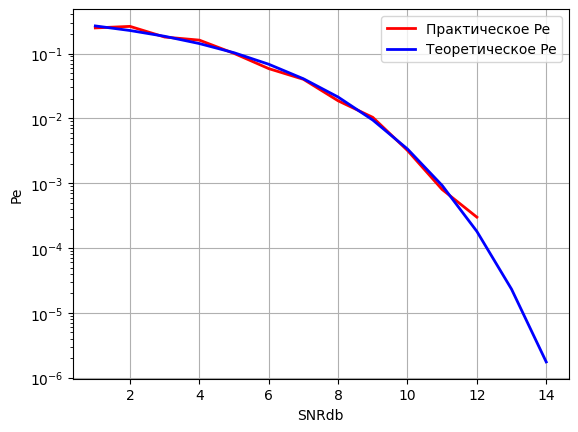

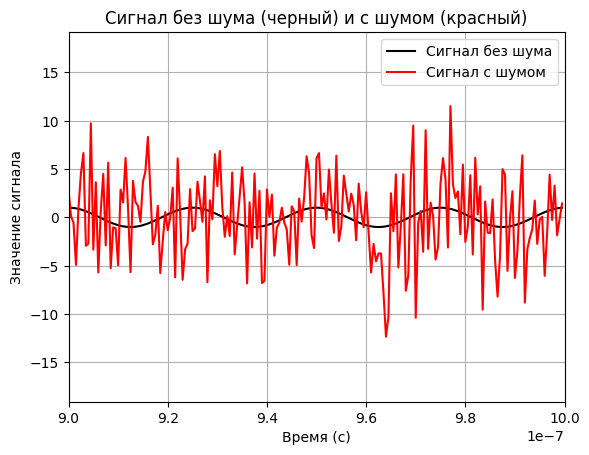

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

q, T, f0 = 2, 1e-6, 40e6
dtf, Ns, A = 1 / T, 50, 1
dt = 1 / (Ns * f0)

t = np.arange(0, T, dt)
f = np.zeros(q)
s = np.zeros((q, len(t)))
f1 = np.zeros((q, len(t)))
f2 = np.zeros((q, len(t)))

for i in range(q):
    f[i] = f0 + (i - 1) * dtf
    s[i, :] = A * np.cos(2 * np.pi * f[i] * t) ## вот это убрать заменить на два массива
    f1[i, :] = np.sqrt(2 / T) * np.cos(2 * np.pi * f[i] * t)
    f2[i, :] = np.sqrt(2 / T) * np.sin(2 * np.pi * f[i] * t)

E = np.linalg.norm(s[0, :])**2
max_value = 0
index_max = 0
Nerrmax = 70
num_tests = 10000
SNRdb = np.arange(1, 15)
Pe = np.zeros(len(SNRdb))
Pe_teor = np.zeros(len(SNRdb))

for ns in range(len(SNRdb)):
    SNR = 10**(SNRdb[ns] / 10)
    N0 = E / SNR
    sigma = np.sqrt(N0 / 2)
    Nerr, Ntest, Pe_t = 0, 0, 0
    
    for l in range(1, q):
        Pe_t += comb(q - 1, l) * (-1)**(l + 1) * 1 / (1 + l) * np.exp(-l / (l + 1) * E / N0)
    last_test = Ntest

    while (Nerr < Nerrmax):
        i = np.random.randint(q)
        r = np.cos(2 * np.pi * f[i] * t + 2 * np.pi * np.random.rand()) + sigma * np.random.randn(len(t)) ## вот эту хуйню изменить

        rci = np.zeros(q)
        rsi = np.zeros(q)
        ni = np.zeros(q)

        for j in range(q):
            rci[j] = np.trapz(r * f1[j, :])
            rsi[j] = np.trapz(r * f2[j, :])
            ni[j] = (rci[j]**2) + (rsi[j]**2)

        max_value = np.max(ni)
        index_max = np.argmax(ni)
        if index_max != i:
            Nerr += 1
            
        Ntest += 1
        if Ntest - last_test > num_tests:
            break
        
    Pe[ns] = Nerr / Ntest
    Pe_teor[ns] = Pe_t

Pe[-2:] = None
plt.figure(1)
plt.semilogy(SNRdb, Pe, 'r', SNRdb, Pe_teor, "blue", linewidth=2)
plt.xlabel('SNRdb')
plt.ylabel('Pe')
plt.legend(['Практическое Pe', 'Теоретическое Pe'])
plt.grid(True)

plt.figure(2)
plt.plot(t, s[i, :], 'k', t, r, 'r')
plt.title('Сигнал без шума (черный) и с шумом (красный)')
plt.xlabel('Время (с)')
plt.ylabel('Значение сигнала')
plt.legend(['Сигнал без шума', 'Сигнал с шумом'])
plt.xlim([0.9 * 10**-6, 1.0 * 10**-6])
plt.grid(True)
plt.show()

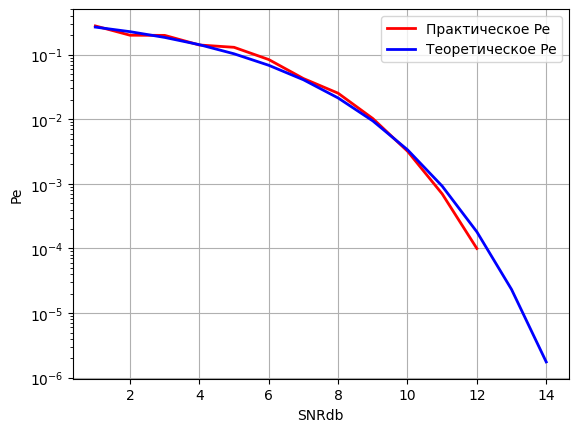

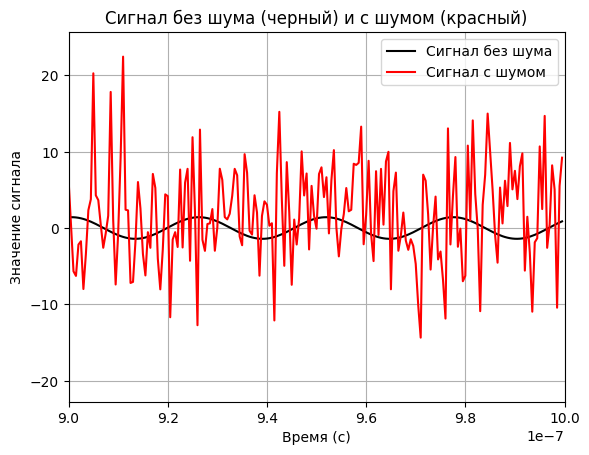

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

q, T, f0 = 2, 1e-6, 40e6
dtf, Ns, A = 1 / T, 50, 1
dt = 1 / (Ns * f0)

t = np.arange(0, T, dt)
f = np.zeros(q)
f1 = np.zeros((q, len(t)))
f2 = np.zeros((q, len(t)))

# TODO: два отдельных массива для sin и cos
cos_array = np.zeros((q, len(t)))
sin_array = np.zeros((q, len(t)))

for i in range(q):
    f[i] = f0 + (i - 1) * dtf
    cos_array[i, :] = A * np.cos(2 * np.pi * f[i] * t)
    sin_array[i, :] = A * np.sin(2 * np.pi * f[i] * t)
    f1[i, :] = np.sqrt(2 / T) * cos_array[i, :]
    f2[i, :] = np.sqrt(2 / T) * sin_array[i, :]

E = np.linalg.norm(cos_array[0, :] + sin_array[0, :])**2
max_value = 0
index_max = 0
Nerrmax = 70
num_tests = 10000
SNRdb = np.arange(1, 15)
Pe = np.zeros(len(SNRdb))
Pe_teor = np.zeros(len(SNRdb))

# TODO: инициализируем сигнал r перед основным циклом программы
r = np.zeros(len(t))

for ns in range(len(SNRdb)):
    SNR = 10**(SNRdb[ns] / 10)
    N0 = E / SNR
    sigma = np.sqrt(N0 / 2)
    Nerr, Ntest, Pe_t = 0, 0, 0
    
    for l in range(1, q):
        Pe_t += comb(q - 1, l) * (-1)**(l + 1) * 1 / (1 + l) * np.exp(-l / (l + 1) * E / N0)
    last_test = Ntest

    while (Nerr < Nerrmax):
        i = np.random.randint(q)
        r = cos_array[i, :] + sin_array[i, :] + 2 * np.pi * np.random.rand() + sigma * np.random.randn(len(t))

        rci = np.zeros(q)
        rsi = np.zeros(q)
        ni = np.zeros(q)

        for j in range(q):
            rci[j] = np.trapz(r * f1[j, :])
            rsi[j] = np.trapz(r * f2[j, :])
            ni[j] = (rci[j]**2) + (rsi[j]**2)

        max_value = np.max(ni)
        index_max = np.argmax(ni)
        if index_max != i:
            Nerr += 1
            
        Ntest += 1
        if Ntest - last_test > num_tests:
            break
        
    Pe[ns] = Nerr / Ntest
    Pe_teor[ns] = Pe_t

Pe[-2:] = None
plt.figure(1)
plt.semilogy(SNRdb, Pe, 'r', SNRdb, Pe_teor, "blue", linewidth=2)
plt.xlabel('SNRdb')
plt.ylabel('Pe')
plt.legend(['Практическое Pe', 'Теоретическое Pe'])
plt.grid(True)

plt.figure(2)
plt.plot(t, cos_array[i, :] + sin_array[i, :], 'k', t, r, 'r')
plt.title('Сигнал без шума (черный) и с шумом (красный)')
plt.xlabel('Время (с)')
plt.ylabel('Значение сигнала')
plt.legend(['Сигнал без шума', 'Сигнал с шумом'])
plt.xlim([0.9 * 10**-6, 1.0 * 10**-6])
plt.grid(True)
plt.show()


In [4]:
Pe

array([0.22292994, 0.23569024, 0.17994859, 0.15555556, 0.10752688,
       0.07415254, 0.03972758, 0.02438175, 0.01000715, 0.00359964,
       0.0009999 , 0.        ,        nan,        nan])

### `ready (fix)`

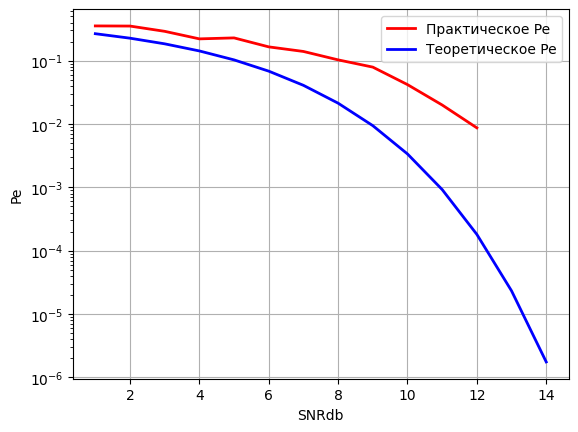

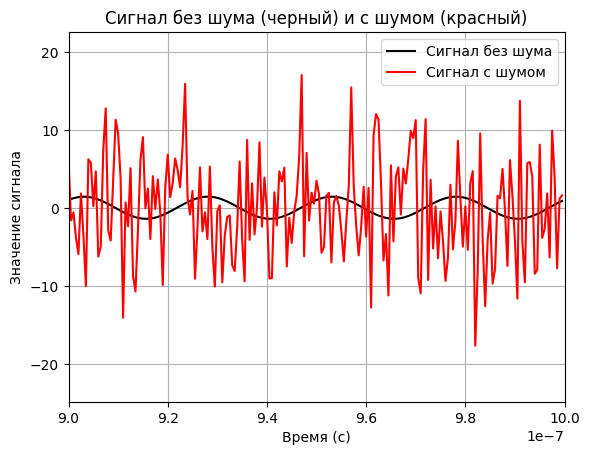

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

q, T, f0 = 2, 1e-6, 40e6
dtf, Ns, A = 1 / T, 50, 1
dt = 1 / (Ns * f0)

t = np.arange(0, T, dt)
f = np.zeros(q)
f1 = np.zeros((q, len(t)))
f2 = np.zeros((q, len(t)))

cos_array = np.zeros((q, len(t)))
sin_array = np.zeros((q, len(t)))

for i in range(q):
    f[i] = f0 + (i - 1) * dtf
    cos_array[i, :] = A * np.cos(2 * np.pi * f[i] * t)
    sin_array[i, :] = A * np.sin(2 * np.pi * f[i] * t)
    f1[i, :] = np.sqrt(2 / T) * cos_array[i, :]
    f2[i, :] = np.sqrt(2 / T) * sin_array[i, :]

E = np.linalg.norm(cos_array[0, :] + sin_array[0, :])**2
max_value = 0
index_max = 0
Nerrmax = 70
num_tests = 10000
SNRdb = np.arange(1, 15)
Pe = np.zeros(len(SNRdb))
Pe_teor = np.zeros(len(SNRdb))

r = np.zeros(len(t))

for ns in range(len(SNRdb)):
    SNR = 10**(SNRdb[ns] / 10)
    N0 = E / SNR
    
    sigma = np.sqrt(N0 / 2)
    sigma2 = (N0 / 2)
    sigma1 = np.sqrt(sigma2)

    Nerr, Ntest, Pe_t = 0, 0, 0

    for l in range(1, q):
        Pe_t += comb(q - 1, l) * (-1)**(l + 1) * 1 / (1 + l) * np.exp(
            -l / (l + 1) * E / N0)
        
    last_test = Ntest

    while (Nerr < Nerrmax):
        i = np.random.randint(q)
        theta = 2 * np.pi * np.random.rand()
        r = np.cos(theta) * cos_array[int(i), :] + np.sin(theta) * sin_array[
            int(i), :] + sigma1 * np.random.randn(len(t))

        rci = np.zeros(q)
        rsi = np.zeros(q)
        ni = np.zeros(q)

        for j in range(q):
            rci[j] = np.trapz(r * f1[j, :])
            rsi[j] = np.trapz(r * f2[j, :])
            ni[j] = (rci[j]**2) + (rsi[j]**2)

        max_value = np.max(ni)
        index_max = np.argmax(ni)
        if index_max != i:
            Nerr += 1

        Ntest += 1
        if Ntest - last_test > num_tests:
            break

    Pe[ns] = Nerr / Ntest
    Pe_teor[ns] = Pe_t

Pe[-2:] = None
plt.figure(1)
plt.semilogy(SNRdb, Pe, 'r', SNRdb, Pe_teor, "blue", linewidth=2)
plt.xlabel('SNRdb')
plt.ylabel('Pe')
plt.legend(['Практическое Pe', 'Теоретическое Pe'])
plt.grid(True)

plt.figure(2)
plt.plot(t, cos_array[i, :] + sin_array[i, :], 'k', t, r, 'r')
plt.title('Сигнал без шума (черный) и с шумом (красный)')
plt.xlabel('Время (с)')
plt.ylabel('Значение сигнала')
plt.legend(['Сигнал без шума', 'Сигнал с шумом'])
plt.xlim([0.9 * 10**-6, 1.0 * 10**-6])
plt.grid(True)
plt.show()

### `fix signal generation`

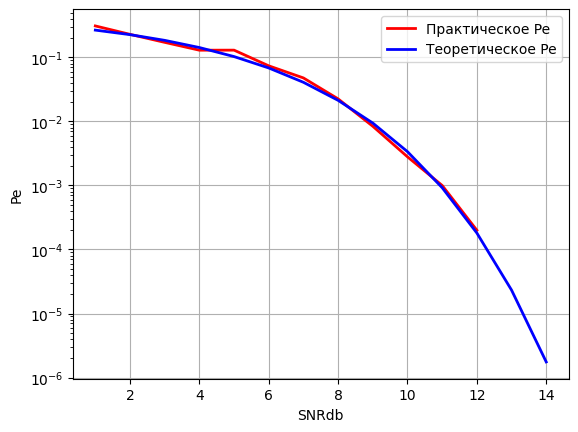

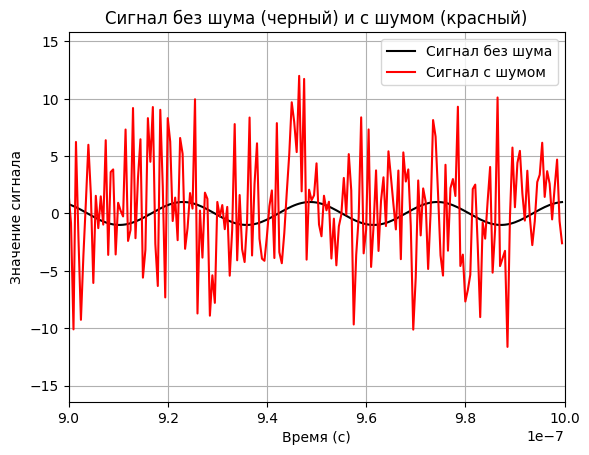

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

q, T, f0 = 2, 1e-6, 40e6

max_value = 0
index_max = 0
Nerrmax = 70
num_tests = 5000

dtf, Ns, A = 1 / T, 50, 1
dt = 1 / (Ns * f0)

t = np.arange(0, T, dt)
f = np.zeros(q)
s = np.zeros((q, len(t)))
cos_array = np.zeros((q, len(t)))
sin_array = np.zeros((q, len(t)))
f1 = np.zeros((q, len(t)))
f2 = np.zeros((q, len(t)))

for i in range(q):
    f[i] = f0 + (i - 1) * dtf
    s[i, :] = A * np.cos(2 * np.pi * f[i] * t)
    cos_array[i, :] = A * np.cos(2 * np.pi * f[i] * t)
    sin_array[i, :] = A * np.sin(2 * np.pi * f[i] * t)
    f1[i, :] = np.sqrt(2 / T) * np.cos(2 * np.pi * f[i] * t)
    f2[i, :] = np.sqrt(2 / T) * np.sin(2 * np.pi * f[i] * t)

E = np.linalg.norm(s[0, :])**2
SNRdb = np.arange(1, 15)
Pe = np.zeros(len(SNRdb))
Pe_teor = np.zeros(len(SNRdb))

for ns in range(len(SNRdb)):
    SNR = 10**(SNRdb[ns] / 10)
    N0 = E / SNR
    sigma = np.sqrt(N0 / 2)
    sigma2 = (N0 / 2)
    sigma1 = np.sqrt(sigma2)
    Nerr, Ntest, Pe_t = 0, 0, 0
    last_test = Ntest

    for l in range(1, q):
        Pe_t += comb(q - 1, l) * (-1)**(l + 1) * 1 / (1 + l) * np.exp(-l / (l + 1) * E / N0)

    while (Nerr < Nerrmax):
        i = np.random.randint(q)
        theta = 2 * np.pi * np.random.rand()
        noise = sigma1 * np.random.randn(len(t))
        r = np.cos(theta) * cos_array[int(i), :] + np.sin(theta) * sin_array[int(i), :] + noise

        rci = np.zeros(q)
        rsi = np.zeros(q)
        ni = np.zeros(q)

        for j in range(q):
            rci[j] = np.trapz(r * f1[j, :])
            rsi[j] = np.trapz(r * f2[j, :])
            ni[j] = (rci[j]**2) + (rsi[j]**2)

        max_value = np.max(ni)
        index_max = np.argmax(ni)

        if index_max != i:
            Nerr += 1

        Ntest += 1
        if Ntest - last_test > num_tests:
            break

    Pe[ns] = Nerr / Ntest
    Pe_teor[ns] = Pe_t

Pe[-2:] = None
plt.figure(1)
plt.semilogy(SNRdb, Pe, 'r', SNRdb, Pe_teor, "blue", linewidth=2)
plt.xlabel('SNRdb')
plt.ylabel('Pe')
plt.legend(['Практическое Pe', 'Теоретическое Pe'])
plt.grid(True)

plt.figure(2)
plt.plot(t, s[i, :], 'k', t, r, 'r')
plt.title('Сигнал без шума (черный) и с шумом (красный)')
plt.xlabel('Время (с)')
plt.ylabel('Значение сигнала')
plt.legend(['Сигнал без шума', 'Сигнал с шумом'])
plt.xlim([0.9 * 10**-6, 1.0 * 10**-6])
plt.grid(True)
plt.show()


### Ксюша

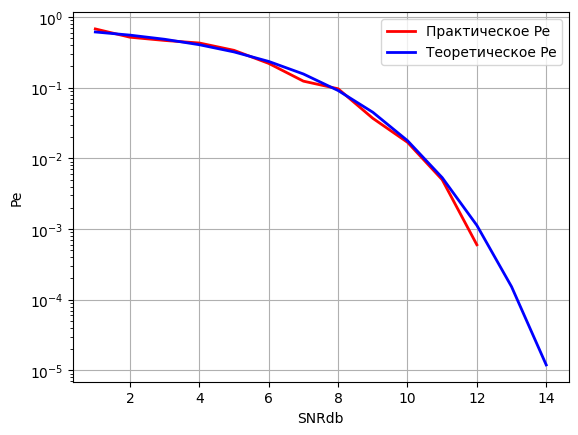

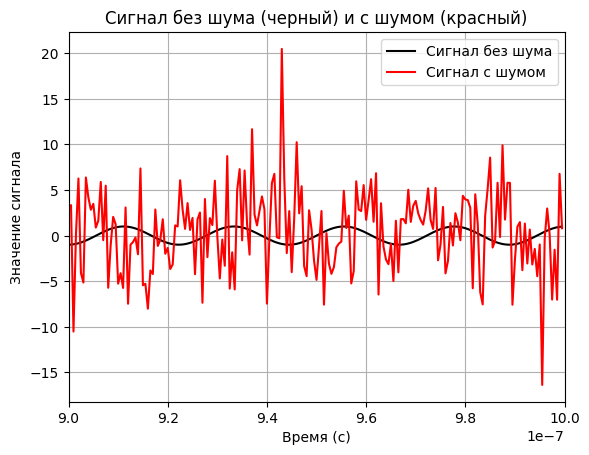

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

q, T, f0 = 8, 1e-6, 40e6

max_value = 0
index_max = 0
Nerrmax = 70
num_tests = 5000

dtf, Ns, A = 1 / T, 50, 1
dt = 1 / (Ns * f0)

t = np.arange(0, T, dt)
f = np.zeros(q)
s = np.zeros((q, len(t)))
cos_array = np.zeros((q, len(t)))
sin_array = np.zeros((q, len(t)))
f1 = np.zeros((q, len(t)))
f2 = np.zeros((q, len(t)))

for i in range(q):
    f[i] = f0 + (i - 1) * dtf
    s[i, :] = A * np.cos(2 * np.pi * f[i] * t)
    cos_array[i, :] = A * np.cos(2 * np.pi * f[i] * t)
    sin_array[i, :] = A * np.sin(2 * np.pi * f[i] * t)
    f1[i, :] = np.sqrt(2 / T) * np.cos(2 * np.pi * f[i] * t)
    f2[i, :] = np.sqrt(2 / T) * np.sin(2 * np.pi * f[i] * t)

E = np.linalg.norm(s[0, :])**2
SNRdb = np.arange(1, 15)
Pe = np.zeros(len(SNRdb))
Pe_teor = np.zeros(len(SNRdb))

for ns in range(len(SNRdb)):
    SNR = 10**(SNRdb[ns] / 10)
    N0 = E / SNR
    sigma = np.sqrt(N0 / 2)
    sigma2 = (N0 / 2)
    sigma1 = np.sqrt(sigma2)
    Nerr, Ntest, Pe_t = 0, 0, 0
    last_test = Ntest

    for l in range(1, q):
        Pe_t += comb(q - 1, l) * (-1)**(l + 1) * 1 / (1 + l) * np.exp(-l / (l + 1) * E / N0)

    while (Nerr < Nerrmax):
        i = np.random.randint(q)
        theta = 2 * np.pi * np.random.rand()
        noise = sigma1 * np.random.randn(len(t))
        r = np.cos(theta) * cos_array[int(i), :] + np.sin(theta) * sin_array[int(i), :] + noise

        rci = np.zeros(q)
        rsi = np.zeros(q)
        ni = np.zeros(q)

        for j in range(q):
            rci[j] = np.trapz(r * f1[j, :])
            rsi[j] = np.trapz(r * f2[j, :])
            ni[j] = (rci[j]**2) + (rsi[j]**2)

        max_value = np.max(ni)
        index_max = np.argmax(ni)

        if index_max != i:
            Nerr += 1

        Ntest += 1
        if Ntest - last_test > num_tests:
            break

    Pe[ns] = Nerr / Ntest
    Pe_teor[ns] = Pe_t

Pe[-2:] = None
plt.figure(1)
plt.semilogy(SNRdb, Pe, 'r', SNRdb, Pe_teor, "blue", linewidth=2)
plt.xlabel('SNRdb')
plt.ylabel('Pe')
plt.legend(['Практическое Pe', 'Теоретическое Pe'])
plt.grid(True)

plt.figure(2)
plt.plot(t, s[i, :], 'k', t, r, 'r')
plt.title('Сигнал без шума (черный) и с шумом (красный)')
plt.xlabel('Время (с)')
plt.ylabel('Значение сигнала')
plt.legend(['Сигнал без шума', 'Сигнал с шумом'])
plt.xlim([0.9 * 10**-6, 1.0 * 10**-6])
plt.grid(True)
plt.show()
